## 08_Extra Material – Clustering

这是第8章的一些附加材料，主要包括以下一些内容：

**1. Introduction – Classification vs Clustering**

**2. K-Means**

  - 2.1 Fit and Predict
  - 2.2 Decision Boundaries
  - 2.3 Hard Clustering vs Soft Clustering
  - 2.4 K-Means Algorithm
  - 2.5 K-Means Variability
  - 2.6 Inertia - 
  - 2.7 Multiple Initializations - 多次初始化
  - 2.8 K-Means++
  - 2.9 Accelerated K-Means
  - 2.10 Mini-Batch K-Means
  - 2.11 Finding the optimal number of clusters
  - 2.12 Limits of K-Means

**3. Cluster 的应用**

  - 3.1 Using clustering for image segmentation - 图像分割
  - 3.2 Using Clustering for Preprocessing - 预测
  - 3.3 Clustering for Semi-supervised Learning - 半监督学习
    
**4. DBSCAN**

**5 Other Clustering Algorithms**

  - 5.1 Spectral Clustering - 光谱聚类
  - 5.2 Agglomerative Clustering - 凝聚聚类
  
**6. Gaussian Mixtures**

  - 6.1 Anomaly Detection using Gaussian Mixtures - 使用高斯混合模型进行异常检测
  - 6.2 Model selection - 模型选择
  - 6.3 Variational Bayesian Gaussian Mixtures - 变分贝叶斯高斯混合
  - 6.4 Likelihood Function - 似然函数


就像前面提到的，第八章的内容比前面任何一章都要多，不过坚持一下，第一部分就结束了，马上就能开启第二部分深度学习的内容了

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "08_ Dimensionality Reduction -- unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 1. Introduction – Classification vs Clustering

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_diagram


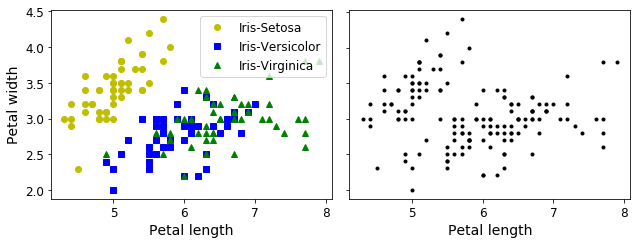

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft='off')

save_fig("classification_vs_clustering_diagram")
plt.show()

高斯混合模型（下面解释）实际上可以很好地分离这些簇。

In [4]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components = 3,random_state = 42).fit(X).predict(X)
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

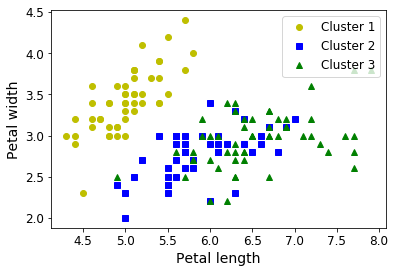

In [5]:
plt.plot(X[y_pred==0, 0], X[y_pred==0, 1], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 0], X[y_pred==1, 1], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 0], X[y_pred==2, 1], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [6]:
np.sum(y_pred==y)

145

In [7]:
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

## 2. K-Means

让我们从生成一些blob开始：

In [8]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]])

blob_std =np.array([0.4,0.3,0.1,0.1,0.1]) 


In [9]:
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                     cluster_std = blob_std,random_state=7)

将上面的数据画出来

In [10]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_diagram


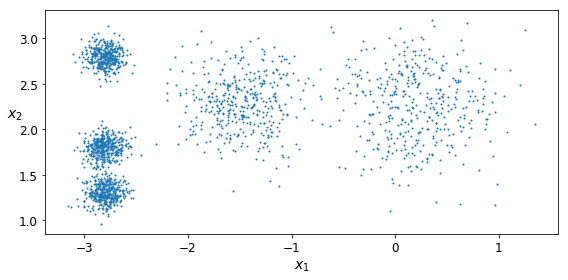

In [11]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_diagram")
plt.show()

### 2.1 Fit and Predict

让我们在这个数据集上训练一个K-Means聚类器。 它将尝试查找每个blob的中心并将每个实例分配给最近的blob：

In [12]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [13]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [14]:
y_pred is kmeans.labels_

True

估计了以下5个质心（即聚类中心）：

In [15]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

请注意，KMeans实例会保留其训练过的实例的标签。 这有点混乱，在这种情况下，实例的标签是分配给实例的聚类的索引：

In [16]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

当然，我们可以预测新实例的标签：

In [17]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

### 2.2 Decision Boundaries

让我们绘制模型的决策边界。 这给了我们一个Voronoi图：

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

Saving figure voronoi_diagram


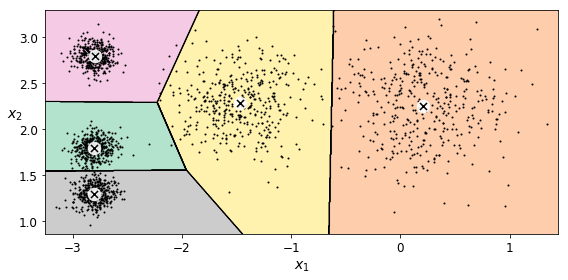

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_diagram")
plt.show()

还不错！ 边缘附近的一些实例可能被分配到错误的聚类（集群），但总体而言看起来非常好。

### 2.3 Hard Clustering vs Soft Clustering

不是任意为每个实例选择最近的集群，这称为**硬集群**，可能更好地测量每个实例与所有5个质心的距离。 这就是**transform（）方法**的作用：

In [20]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

您可以验证这确实是每个实例与每个质心之间的欧式距离：

In [21]:
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2) - kmeans.cluster_centers_,axis = 2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### 2.4 K-Means Algorithm

K-Means算法是最快的聚类算法之一，也是最简单的算法之一：

- 首先随机初始化$ k $ centroids：从数据集中随机选择$ k $ distinct个体，并将质心放置在它们的位置。

- 重复直到收敛（即，直到质心停止移动）：

  - 将每个实例分配给最近的质心。
  - 将质心更新为分配给它们的实例的平均值。
  
  
**KMeans类默认应用优化算法**。要获得原始K-Means算法（仅用于教育目的），你必须设置**init =“random”，n_init = 1**和**algorithm =“full”**。这些超参数将在下面解释。

让我们运行K-Means算法进行1,2和3次迭代，看看质心是如何移动的：

In [22]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

Saving figure kmeans_algorithm_diagram


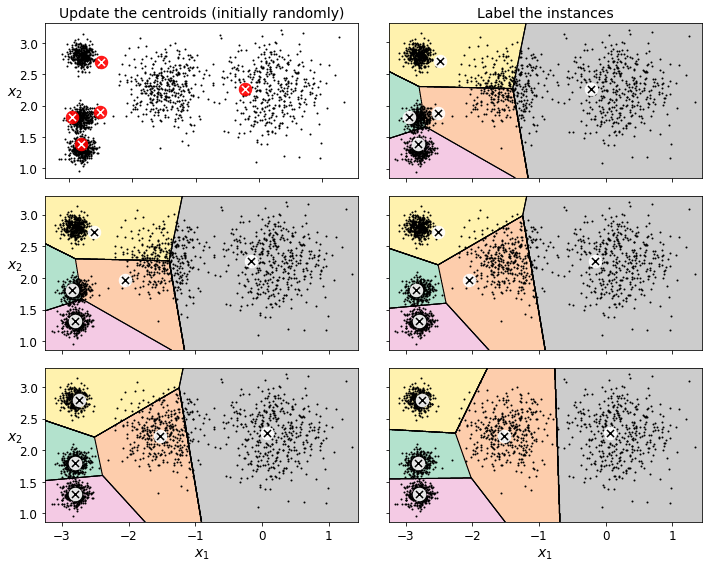

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom='off')
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_diagram")
plt.show()

### 2.5 K-Means Variability

**K均值可变性**

在原始的K-Means算法中，质心只是随机初始化，如上所述，算法只需运行一次迭代即可逐步改善质心。然而，这种方法的一个主要问题是，如果你多次运行K-Means（或使用不同的随机种子），它可以汇聚到非常不同的解决方案，如下所示：

In [24]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_diagram


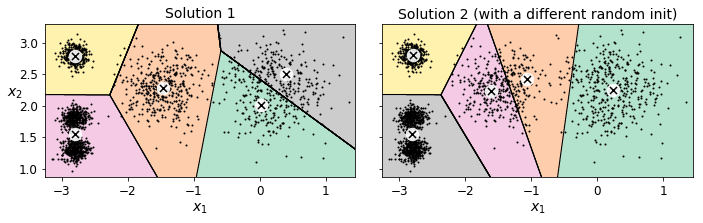

In [25]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_diagram")
plt.show()

### 2.6 Inertia

要选择最佳模型，我们需要一种方法来评估K-Mean模型的性能。不幸的是，聚类是一种无监督任务，因此我们没有目标可以用。但至少我们可以**测量每个实例与其质心之间的距离。 这是惯性度量背后的想法**：

In [26]:
kmeans.inertia_

211.5985372581684

你可以轻松进行验证，**Inertia**是每个训练实例与其最近质心之间的平方距离的总和：

In [27]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2)

211.59853725816856

**score（）方法**返回负惯性。 这是因为预测器的**score（）方法**必须始终尊重**“great is better”**的规则。

In [28]:
kmeans.score(X)

-211.59853725816856

### 2.7 Multiple Initializations

**多次初始化**
因此，**解决可变性问题的一种方法是简单地使用不同的随机初始化多次运行K-Means算法**，并选择最小化惯性的解决方案。
例如，以下是上图中显示的两个“bad”模型的惯性：

In [29]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [30]:
kmeans_rnd_init2.inertia_

237.46249169442845

正如你所看到的，它们比我们训练的第一个“好”模型具有更高的惯性，这意味着它们可能更糟。

当你设置**n_init**超参数时，Scikit-Learn会运行原始算法**n_init**次，并选择最小化惯性的解决方案。 默认情况下，Scikit-Learn设置**n_init = 10**。

In [31]:
kmeans_rnd_10_inits = KMeans(
    n_clusters=5,
    init='random',
    n_init=10,
    algorithm="full",
    random_state=11)

kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

正如你所看到的，我们最终得到的是初始模型，这肯定是最优的K-Means解决方案（至少在惯性方面，假设$ k = 5 $）。

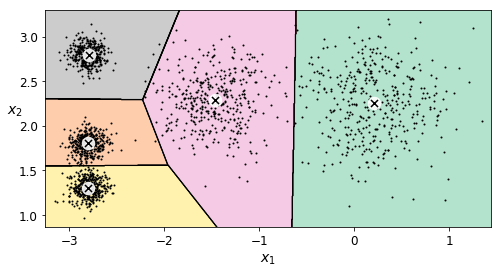

In [32]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### 2.8 K-Means++

最好使用David Arthur和Sergei Vassilvitskii在2006年的论文中提出的以下算法对它们进行初始化，而不是完全随机地初始化质心，：

- 取一个质心$ c_1 $，从数据集中随机统一选择。
- 取一个新的$ c_i $中心，选择一个实例$ \ mathbf {x} _i $，概率为：$ D(\ mathbf {x} _i)^ 2 $ / $ \ sum \ limits_ {j = 1} ^ {m} {D(\ mathbf {x} _j)} ^ 2 $其中$ D(\ mathbf {x} _i)$是实例$ \ mathbf {x} _i $与已选择的最近质心之间的距离。 该概率分布确保更远离已经选择的质心的实例更可能被选择为质心。

- 重复上一步，直到选择了所有$ k $ centroids。

**K-Means ++** 算法的其余部分只是常规的K-Means。通过这种初始化，K-Means算法很可能收敛到次优解，因此可以显着减少n_init。大多数情况下，这在很大程度上弥补了初始化过程的额外复杂性。

要将初始化设置为K-Means ++，只需设置**init =“k-means ++”**（这实际上是默认值）：

In [33]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### 2.9 Accelerated K-Means

通过避免许多不必要的距离计算，可以显着加速K-Means算法：这是通过利用三角形不等式（给定三个点A，B和C，距离AC总是使得AC≤AB+ BC）并通过跟踪实例和质心之间的距离的下限和上限来实现的。（有关详细信息，请参阅Charles Elkan撰写的[2003年论文](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf)）。

要使用Elkan的K-Means变体，只需设置**algorithm =“elkan”**。请注意，它**不支持稀疏数据**，因此默认情况下，Scikit-Learn使用**“elkan”表示密集数据**，使用**“full”（常规K-Means算法）表示稀疏数据**。

In [35]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

74.6 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [36]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

88 ms ± 5.37 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### 2.10 Mini-Batch K-Means

Scikit-Learn还实现了支持小批量的K-Means算法的变体（[参见本文](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)）：

In [37]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)



MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [38]:
minibatch_kmeans.inertia_

211.93186531476775

如果数据集不适合内存，最简单的选择是使用**memmap类**，就像我们对**增量PCA**所做的那样：

In [39]:
filename = "my_mnist.data"
m, n = 50000, 28*28
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

In [40]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

如果您的数据太大而无法使用memmap，那么事情会变得更加复杂。 让我们首先编写一个函数来加载下一个batch（在现实生活中，你将从磁盘加载数据）：

In [41]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

现在我们可以通过**一次喂食一次来训练模型**。 我们**还需要实现多次初始化并保持模型的惯性最小**：

In [42]:
np.random.seed(42)

In [43]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [44]:
best_kmeans.score(X)

-211.70999744411483

小批量K-Means比常规 K-Means快得多：

In [45]:
%timeit KMeans(n_clusters=5).fit(X)

37.2 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

16.5 ms ± 947 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


要快得多！ 然而，它的性能通常较低（惯性较大），并且随着k的增加而不断下降。 让我们绘制小批量K-Means和常规K-Means之间的惯性比和训练时间比：

In [47]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure minibatch_kmeans_vs_kmeans


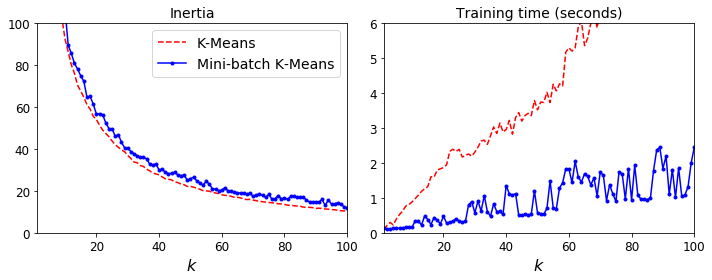

In [48]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Inertia", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
#plt.ylabel("Training time (seconds)", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
#plt.legend(fontsize=14)

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### 2.11 Finding the optimal number of clusters 

**找到最佳簇数**

如果簇的数量设置为低于或大于5的值，该怎么办？

Saving figure bad_n_clusters_diagram


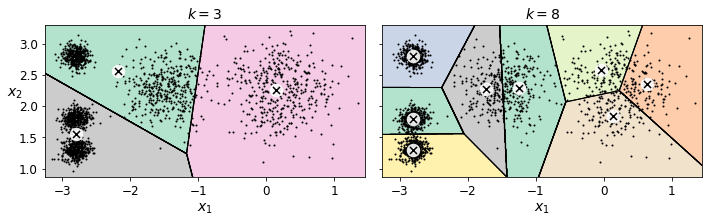

In [49]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_diagram")
plt.show()

这两个型号看起来不太好。 看看他们的惯性怎么样？

In [50]:
kmeans_k3.inertia_

653.2167190021553

In [51]:
kmeans_k8.inertia_

119.11983416102879

不，我们不能简单地通过 $ k $ 的价值来减少惯性，因为随着我们增加 $ k $ 它会不断降低。 实际上，**存在的簇越多，每个实例越接近其最接近的质心**，因此惯性越小。 但是，我们可以**将惯性绘制为 $ k $ 的函数并分析得到的曲线**：

In [52]:
# 取 k 值 等于: 1,2,3,4,5,6,7,8,9,10
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_diagram


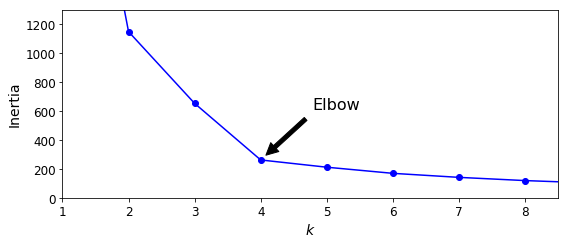

In [53]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_diagram")
plt.show()

正如你所看到的，有一个肘部在$ k = 4 $，这意味着较少的集群比较糟糕，更多的集群不会有太多帮助，可能会将集群减少一半。 所以$ k = 4 $是个不错的选择。 当然在这个例子中它并不完美，因为它意味着左下方的两个blob将被视为一个集群，但它仍然是一个非常好的聚类(集群)。

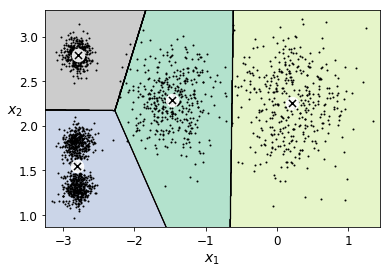

In [54]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

**另一种方法是查看轮廓分数**，即所有实例的平均轮廓系数。实例的轮廓系数等于$（b-a）/ \ max（a，b）$，其中$ a $是到同一集群中其他实例的平均距离（它是平均簇内距离），并且 $ b $是平均最近集群距离，即到下一个最近集群实例的平均距离（定义为最小化$ b $的集群，不包括实例自己的集群）。

轮廓系数可以在-1和+1之间变化：
- 接近 $+1$ 的系数意味着实例完全在其自己的集群内并远离其他集群，
- 而接近 $0$ 的系数意味着它接近集群边界， 
- 最后系数接近 $-1$ 意味着实例可能已被分配给错误的集群。

让我们将轮廓分数绘制为$ k $的函数：

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.34507909442492657

In [57]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_diagram


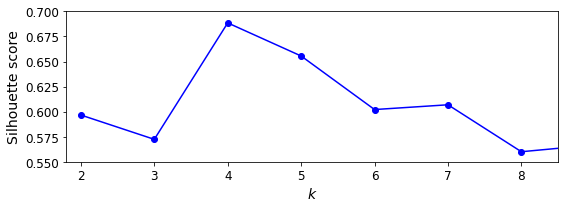

In [58]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_diagram")
plt.show()

正如你所看到的，这个可视化比前一个更丰富：特别是，虽然它确认$ k = 4 $是一个非常好的选择，但它也强调了$ k = 5 $的事实也是相当不错的。

当你绘制每个实例的轮廓系数时，会给出更加翔实的可视化，按照分配给它们的聚类和系数的值进行排序。 这称为轮廓图：

Saving figure silhouette_analysis_diagram


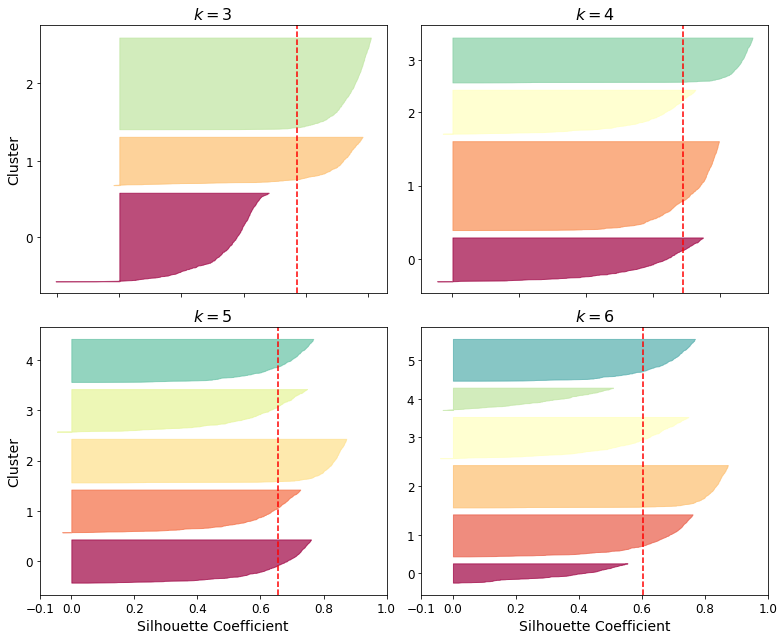

In [59]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom='off')

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_diagram")
plt.show()

### 2.12 Limits of K-Means


In [61]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

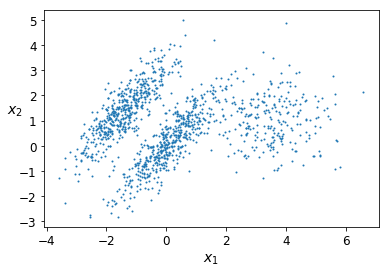

In [62]:
plot_clusters(X)

In [63]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Saving figure bad_kmeans_diagram


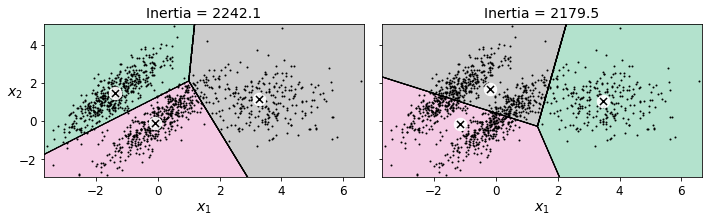

In [64]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_diagram")
plt.show()

## 3. Cluster 的应用

### 3.1 Using clustering for image segmentation - 图像分割

In [70]:
from matplotlib.image import imread
image = imread(os.path.join(PROJECT_ROOT_DIR,"images","08_ Dimensionality Reduction -- unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

In [71]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [72]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


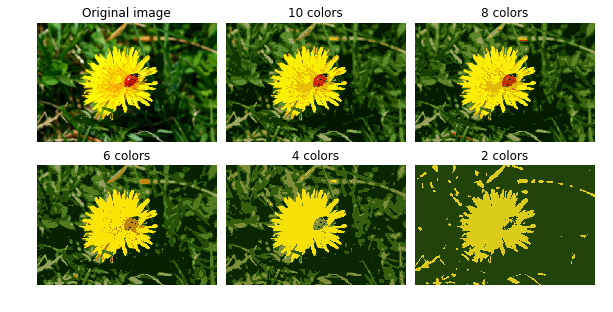

In [74]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

### 3.2 Using Clustering for Preprocessing - 预测

让我们来处理数字数据集，这是一个简单的类似MNIST的数据集，包含1,797个灰度8×8图像，代表数字0到9。

In [77]:
from sklearn.datasets import load_digits

X_digits,y_digits = load_digits(return_X_y = True)

划分训练集和测试集

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

现在让我们拟合一个Logistic回归模型并在测试集上进行评估：

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 40)
log_reg.fit(X_train,y_train)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
log_reg.score(X_test,y_test)

0.9666666666666667

好的，这是我们的**基线**：准确率为96.7％。 让我们看看我们是否可以通过**使用K-Means作为预处理步骤**来做得更好。 我们将创建一个管道，
- 首先将训练集聚类为50个集群，并将图像替换为50个集群的距离，
- 然后应用逻辑回归模型：

In [83]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50,random_state = 42)),
    ("log_reg",LogisticRegression(random_state=42)),
])
pipeline.fit(X_train,y_train)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [85]:
pipeline.score(X_test,y_test)

0.9822222222222222

In [86]:
1-(1-0.9822222)/(1-0.9666666)

0.4666670666658673

这个怎么样？ 我们几乎将错误率除以2倍！ **但我们是完全随意选择的簇数$ k $，我们肯定可以做得更好**。 由于K-Means只是分类管道中的预处理步骤，因此为$ k $找到一个好的值比以前简单得多：**不需要执行轮廓分析或最小化惯性，$ k $的最佳值就是 一个导致最佳分类性能的**。

In [87]:
# 网格搜索最佳参数
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid,cv=3,verbose=2)
grid_clf.fit(X_train,y_train)


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: De

[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian

[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=5, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] ............................. kmeans__n_clusters=5, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=5, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................
[CV] ............................. kmeans__n_clusters=6, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=6, total=   0.0s
[CV] kmeans__n_clusters=6 ............................................
[CV] ............................. kmeans__n_clusters=6, total=   0.1s
[CV] kmeans__n_clusters=7 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=7, total=   0.1s
[CV] kmeans__n_clusters=7 ............................................
[CV] ............................. kmeans__n_clusters=7, total=   0.0s
[CV] kmeans__n_clusters=7 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=7, total=   0.0s
[CV] kmeans__n_clusters=8 ............................................
[CV] ............................. kmeans__n_clusters=8, total=   0.0s
[CV] kmeans__n_clusters=8 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=8, total=   0.0s
[CV] kmeans__n_clusters=8 ............................................
[CV] ............................. kmeans__n_clusters=8, total=   0.0s
[CV] kmeans__n_clusters=9 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................. kmeans__n_clusters=9, total=   0.0s
[CV] kmeans__n_clusters=9 ............................................
[CV] ............................. kmeans__n_clusters=9, total=   0.1s
[CV] kmeans__n_clusters=9 ............................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................. kmeans__n_clusters=9, total=   0.1s
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=   0.1s

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=   0.1s
[CV] kmeans__n_clusters=10 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=10, total=   0.1s
[CV] kmeans__n_clusters=11 ...........................................
[CV] ............................ kmeans__n_clusters=11, total=   0.1s
[CV] kmeans__n_clusters=11 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=11, total=   0.1s
[CV] kmeans__n_clusters=11 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=11, total=   0.1s
[CV] kmeans__n_clusters=12 ...........................................
[CV] ............................ kmeans__n_clusters=12, total=   0.0s
[CV] kmeans__n_clusters=12 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ kmeans__n_clusters=12, total=   0.1s
[CV] kmeans__n_clusters=12 ...........................................
[CV] ............................ kmeans__n_clusters=12, total=   0.1s

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] kmeans__n_clusters=13 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=13, total=   0.1s
[CV] kmeans__n_clusters=13 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=13, total=   0.1s
[CV] kmeans__n_clusters=13 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=13, total=   0.1s
[CV] kmeans__n_clusters=14 ...........................................
[CV] ............................ kmeans__n_clusters=14, total=   0.1s
[CV] kmeans__n_clusters=14 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=14, total=   0.1s
[CV] kmeans__n_clusters=14 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ kmeans__n_clusters=14, total=   0.1s
[CV] kmeans__n_clusters=15 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=15, total=   0.1s
[CV] kmeans__n_clusters=15 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=15, total=   0.2s
[CV] kmeans__n_clusters=15 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=15, total=   0.1s
[CV] kmeans__n_clusters=16 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=16, total=   0.1s
[CV] kmeans__n_clusters=16 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=16, total=   0.1s
[CV] kmeans__n_clusters=16 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............................ kmeans__n_clusters=16, total=   0.1s
[CV] kmeans__n_clusters=17 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=17, total=   0.1s
[CV] kmeans__n_clusters=17 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=17, total=   0.1s
[CV] kmeans__n_clusters=17 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=17, total=   0.1s
[CV] kmeans__n_clusters=18 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=18, total=   0.1s
[CV] kmeans__n_clusters=18 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=18, total=   0.2s
[CV] kmeans__n_clusters=18 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=18, total=   0.2s
[CV] kmeans__n_clusters=19 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=19, total=   0.2s
[CV] kmeans__n_clusters=19 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=19, total=   0.1s
[CV] kmeans__n_clusters=19 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=19, total=   0.2s
[CV] kmeans__n_clusters=20 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=20, total=   0.2s
[CV] kmeans__n_clusters=20 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=20, total=   0.2s
[CV] kmeans__n_clusters=20 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=20, total=   0.1s
[CV] kmeans__n_clusters=21 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=21, total=   0.2s
[CV] kmeans__n_clusters=21 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=21, total=   0.2s
[CV] kmeans__n_clusters=21 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=21, total=   0.1s
[CV] kmeans__n_clusters=22 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=25 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=25, total=   0.2s
[CV] kmeans__n_clusters=25 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=25, total=   0.2s
[CV] kmeans__n_clusters=25 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=25, total=   0.2s
[CV] kmeans__n_clusters=26 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=26, total=   0.2s
[CV] kmeans__n_clusters=26 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=26, total=   0.1s
[CV] kmeans__n_clusters=26 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=26, total=   0.2s
[CV] kmeans__n_clusters=27 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=27, total=   0.2s
[CV] kmeans__n_clusters=27 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=27, total=   0.2s
[CV] kmeans__n_clusters=27 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=27, total=   0.2s
[CV] kmeans__n_clusters=28 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=28, total=   0.2s
[CV] kmeans__n_clusters=28 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=28, total=   0.3s
[CV] kmeans__n_clusters=28 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=28, total=   0.2s
[CV] kmeans__n_clusters=29 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=29, total=   0.2s
[CV] kmeans__n_clusters=29 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=29, total=   0.2s
[CV] kmeans__n_clusters=29 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=29, total=   0.2s
[CV] kmeans__n_clusters=30 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=30, total=   0.2s
[CV] kmeans__n_clusters=30 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=30, total=   0.2s
[CV] kmeans__n_clusters=30 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=30, total=   0.2s
[CV] kmeans__n_clusters=31 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=31, total=   0.2s
[CV] kmeans__n_clusters=31 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=31, total=   0.2s
[CV] kmeans__n_clusters=31 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=31, total=   0.3s
[CV] kmeans__n_clusters=32 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=32, total=   0.3s
[CV] kmeans__n_clusters=32 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=32, total=   0.2s
[CV] kmeans__n_clusters=32 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=32, total=   0.3s
[CV] kmeans__n_clusters=33 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=33, total=   0.2s
[CV] kmeans__n_clusters=33 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=33, total=   0.2s
[CV] kmeans__n_clusters=33 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=33, total=   0.2s
[CV] kmeans__n_clusters=34 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=34, total=   0.2s
[CV] kmeans__n_clusters=34 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=34, total=   0.3s
[CV] kmeans__n_clusters=34 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=34, total=   0.3s
[CV] kmeans__n_clusters=35 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=35, total=   0.3s
[CV] kmeans__n_clusters=35 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=35, total=   0.3s
[CV] kmeans__n_clusters=35 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=35, total=   0.3s
[CV] kmeans__n_clusters=36 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=36, total=   0.3s
[CV] kmeans__n_clusters=36 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=36, total=   0.3s
[CV] kmeans__n_clusters=36 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=36, total=   0.3s
[CV] kmeans__n_clusters=37 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=37, total=   0.3s
[CV] kmeans__n_clusters=37 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=37, total=   0.3s
[CV] kmeans__n_clusters=37 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=37, total=   0.3s
[CV] kmeans__n_clusters=38 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=38, total=   0.3s
[CV] kmeans__n_clusters=38 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=38, total=   0.3s
[CV] kmeans__n_clusters=38 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=38, total=   0.3s
[CV] kmeans__n_clusters=39 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=39, total=   0.3s
[CV] kmeans__n_clusters=39 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=39, total=   0.3s
[CV] kmeans__n_clusters=39 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=39, total=   0.3s
[CV] kmeans__n_clusters=40 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=40, total=   0.3s
[CV] kmeans__n_clusters=40 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=40, total=   0.3s
[CV] kmeans__n_clusters=40 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=40, total=   0.3s
[CV] kmeans__n_clusters=41 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=41 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=41 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=42, total=   0.4s
[CV] kmeans__n_clusters=43 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=44 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=44, total=   0.3s
[CV] kmeans__n_clusters=44 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=44, total=   0.3s
[CV] kmeans__n_clusters=44 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=44, total=   0.3s
[CV] kmeans__n_clusters=45 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=45, total=   0.3s
[CV] kmeans__n_clusters=45 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=45, total=   0.3s
[CV] kmeans__n_clusters=45 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=45, total=   0.3s
[CV] kmeans__n_clusters=46 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=46, total=   0.3s
[CV] kmeans__n_clusters=46 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=46, total=   0.3s
[CV] kmeans__n_clusters=46 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=46, total=   0.4s
[CV] kmeans__n_clusters=47 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=47, total=   0.4s
[CV] kmeans__n_clusters=47 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=47, total=   0.3s
[CV] kmeans__n_clusters=47 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=47, total=   0.4s
[CV] kmeans__n_clusters=48 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=48, total=   0.4s
[CV] kmeans__n_clusters=48 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=48, total=   0.3s
[CV] kmeans__n_clusters=48 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=48, total=   0.3s
[CV] kmeans__n_clusters=49 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=49, total=   0.4s
[CV] kmeans__n_clusters=49 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=49, total=   0.3s
[CV] kmeans__n_clusters=49 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=49, total=   0.3s
[CV] kmeans__n_clusters=50 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=50, total=   0.4s
[CV] kmeans__n_clusters=50 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=50, total=   0.4s
[CV] kmeans__n_clusters=50 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=50, total=   0.4s
[CV] kmeans__n_clusters=51 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=51, total=   0.4s
[CV] kmeans__n_clusters=51 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=51, total=   0.4s
[CV] kmeans__n_clusters=51 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=51, total=   0.3s
[CV] kmeans__n_clusters=52 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=52, total=   0.3s
[CV] kmeans__n_clusters=52 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=52, total=   0.4s
[CV] kmeans__n_clusters=52 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=52, total=   0.4s
[CV] kmeans__n_clusters=53 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=53 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=53 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=53, total=   0.5s
[CV] kmeans__n_clusters=54 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=54, total=   0.5s
[CV] kmeans__n_clusters=54 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=54, total=   0.4s
[CV] kmeans__n_clusters=54 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=54, total=   0.4s
[CV] kmeans__n_clusters=55 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=55, total=   0.5s
[CV] kmeans__n_clusters=55 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=55, total=   0.5s
[CV] kmeans__n_clusters=55 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=55, total=   0.4s
[CV] kmeans__n_clusters=56 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=56, total=   0.4s
[CV] kmeans__n_clusters=56 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=56, total=   0.4s
[CV] kmeans__n_clusters=56 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=56, total=   0.5s
[CV] kmeans__n_clusters=57 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=57, total=   0.4s
[CV] kmeans__n_clusters=57 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=57, total=   0.5s
[CV] kmeans__n_clusters=57 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=57, total=   0.5s
[CV] kmeans__n_clusters=58 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=58, total=   0.4s
[CV] kmeans__n_clusters=58 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=58, total=   0.4s
[CV] kmeans__n_clusters=58 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=58, total=   0.4s
[CV] kmeans__n_clusters=59 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=59, total=   0.4s
[CV] kmeans__n_clusters=59 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=59, total=   0.4s
[CV] kmeans__n_clusters=59 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=59, total=   0.4s
[CV] kmeans__n_clusters=60 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=60, total=   0.4s
[CV] kmeans__n_clusters=60 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=60, total=   0.4s
[CV] kmeans__n_clusters=60 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=60, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=63 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=63, total=   0.5s
[CV] kmeans__n_clusters=63 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=63, total=   0.5s
[CV] kmeans__n_clusters=63 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=63, total=   0.4s
[CV] kmeans__n_clusters=64 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=64, total=   0.4s
[CV] kmeans__n_clusters=64 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=64, total=   0.5s
[CV] kmeans__n_clusters=64 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=64, total=   0.4s
[CV] kmeans__n_clusters=65 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=65, total=   0.5s
[CV] kmeans__n_clusters=65 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=65, total=   0.5s
[CV] kmeans__n_clusters=65 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=65, total=   0.5s
[CV] kmeans__n_clusters=66 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=66, total=   0.5s
[CV] kmeans__n_clusters=66 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=66, total=   0.5s
[CV] kmeans__n_clusters=66 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=66, total=   0.5s
[CV] kmeans__n_clusters=67 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=67, total=   0.5s
[CV] kmeans__n_clusters=67 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=67, total=   0.5s
[CV] kmeans__n_clusters=67 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=67, total=   0.5s
[CV] kmeans__n_clusters=68 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=68, total=   0.5s
[CV] kmeans__n_clusters=68 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=68, total=   0.4s
[CV] kmeans__n_clusters=68 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=68, total=   0.5s
[CV] kmeans__n_clusters=69 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=69, total=   0.5s
[CV] kmeans__n_clusters=69 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=69, total=   0.5s
[CV] kmeans__n_clusters=69 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=69, total=   0.5s
[CV] kmeans__n_clusters=70 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=70, total=   0.5s
[CV] kmeans__n_clusters=70 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=70, total=   0.5s
[CV] kmeans__n_clusters=70 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=70, total=   0.5s
[CV] kmeans__n_clusters=71 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=71, total=   0.5s
[CV] kmeans__n_clusters=71 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=71, total=   0.5s
[CV] kmeans__n_clusters=71 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=71, total=   0.5s
[CV] kmeans__n_clusters=72 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=72, total=   0.5s
[CV] kmeans__n_clusters=72 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=72, total=   0.5s
[CV] kmeans__n_clusters=72 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=72, total=   0.5s
[CV] kmeans__n_clusters=73 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=73, total=   0.5s
[CV] kmeans__n_clusters=73 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=73, total=   0.6s
[CV] kmeans__n_clusters=73 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=73, total=   0.5s
[CV] kmeans__n_clusters=74 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=74, total=   0.5s
[CV] kmeans__n_clusters=74 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=74, total=   0.5s
[CV] kmeans__n_clusters=74 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=74, total=   0.5s
[CV] kmeans__n_clusters=75 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=75, total=   0.5s
[CV] kmeans__n_clusters=75 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=75, total=   0.6s
[CV] kmeans__n_clusters=75 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=75, total=   0.5s
[CV] kmeans__n_clusters=76 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=76, total=   0.6s
[CV] kmeans__n_clusters=76 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=76, total=   0.6s
[CV] kmeans__n_clusters=76 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=76, total=   0.5s
[CV] kmeans__n_clusters=77 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=77, total=   0.5s
[CV] kmeans__n_clusters=77 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=77, total=   0.6s
[CV] kmeans__n_clusters=77 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=77, total=   0.6s
[CV] kmeans__n_clusters=78 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=78, total=   0.6s
[CV] kmeans__n_clusters=78 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=78, total=   0.5s
[CV] kmeans__n_clusters=78 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=78, total=   0.6s
[CV] kmeans__n_clusters=79 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=79, total=   0.5s
[CV] kmeans__n_clusters=79 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=79, total=   0.6s
[CV] kmeans__n_clusters=79 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=79, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=80, total=   0.5s
[CV] kmeans__n_clusters=81 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=81, total=   0.5s
[CV] kmeans__n_clusters=81 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=83 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=83, total=   0.6s
[CV] kmeans__n_clusters=83 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=83, total=   0.6s
[CV] kmeans__n_clusters=83 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=83, total=   0.6s
[CV] kmeans__n_clusters=84 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=84, total=   0.6s
[CV] kmeans__n_clusters=84 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=84, total=   0.6s
[CV] kmeans__n_clusters=84 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=84, total=   0.6s
[CV] kmeans__n_clusters=85 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=85, total=   0.6s
[CV] kmeans__n_clusters=85 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=85, total=   0.7s
[CV] kmeans__n_clusters=85 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=85, total=   0.6s
[CV] kmeans__n_clusters=86 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=86, total=   0.6s
[CV] kmeans__n_clusters=86 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=86, total=   0.6s
[CV] kmeans__n_clusters=86 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=86, total=   0.7s
[CV] kmeans__n_clusters=87 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=87, total=   0.6s
[CV] kmeans__n_clusters=87 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=87, total=   0.8s
[CV] kmeans__n_clusters=87 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=87, total=   0.6s
[CV] kmeans__n_clusters=88 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=88, total=   0.6s
[CV] kmeans__n_clusters=88 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=88, total=   0.6s
[CV] kmeans__n_clusters=88 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=88, total=   0.7s
[CV] kmeans__n_clusters=89 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=89, total=   0.7s
[CV] kmeans__n_clusters=89 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=89, total=   0.8s
[CV] kmeans__n_clusters=89 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=89, total=   0.7s
[CV] kmeans__n_clusters=90 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=90, total=   0.7s
[CV] kmeans__n_clusters=90 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=90, total=   0.7s
[CV] kmeans__n_clusters=90 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=90, total=   0.7s
[CV] kmeans__n_clusters=91 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=91, total=   0.7s
[CV] kmeans__n_clusters=91 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=91, total=   0.6s
[CV] kmeans__n_clusters=91 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=91, total=   0.6s
[CV] kmeans__n_clusters=92 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=92, total=   0.6s
[CV] kmeans__n_clusters=92 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=92, total=   0.7s
[CV] kmeans__n_clusters=92 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=92, total=   0.7s
[CV] kmeans__n_clusters=93 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=93, total=   0.7s
[CV] kmeans__n_clusters=93 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=93, total=   0.7s
[CV] kmeans__n_clusters=93 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=93, total=   0.7s
[CV] kmeans__n_clusters=94 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=94, total=   0.8s
[CV] kmeans__n_clusters=94 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=94, total=   0.7s
[CV] kmeans__n_clusters=94 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=94, total=   0.7s
[CV] kmeans__n_clusters=95 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=95, total=   0.7s
[CV] kmeans__n_clusters=95 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=95, total=   0.7s
[CV] kmeans__n_clusters=95 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=95, total=   0.7s
[CV] kmeans__n_clusters=96 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=96, total=   0.7s
[CV] kmeans__n_clusters=96 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=96, total=   0.7s
[CV] kmeans__n_clusters=96 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=96, total=   0.7s
[CV] kmeans__n_clusters=97 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=97, total=   0.7s
[CV] kmeans__n_clusters=97 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=97, total=   0.7s
[CV] kmeans__n_clusters=97 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=97, total=   0.7s
[CV] kmeans__n_clusters=98 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=98, total=   0.7s
[CV] kmeans__n_clusters=98 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=98, total=   0.7s
[CV] kmeans__n_clusters=98 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=98, total=   0.7s
[CV] kmeans__n_clusters=99 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=99, total=   0.7s
[CV] kmeans__n_clusters=99 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=99, total=   0.7s
[CV] kmeans__n_clusters=99 ...........................................


C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] ............................ kmeans__n_clusters=99, total=   0.7s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  2.3min finished
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, ... penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [88]:
grid_clf.best_params_

{'kmeans__n_clusters': 90}

In [89]:
grid_clf.score(X_test,y_test)

0.9844444444444445

当$ k = 90 $时，性能略有提升，因此它是90。

### 3.3 Clustering for Semi-supervised Learning - 半监督学习

当我们**有大量未标记的实例和非常少的标记实例**时，聚类的另一个用处是**半监督学习**。

让我们看看当我们只有50个标记实例时逻辑回归模型的性能： 

In [90]:
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8266666666666667

它当然要比早些时候少得多。 让我们看看我们如何才能做得更好。
- 首先，让我们将训练集聚类为50个集群，
- 然后对于每个聚类，让我们找到最靠近质心的图像。 我们将这些图像称为代表性图像：

In [96]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

现在让我们绘制这些代表性图像并**手动标记它们**：

Saving figure representative_images_diagram


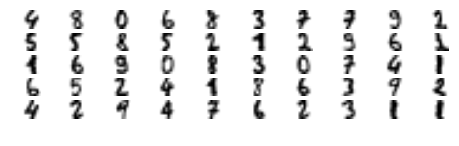

In [97]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [98]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

现在我们有一个只有50个标记实例的数据集，它们中的每一个都是其集群的代表性图像，而不是完全随机的实例。 让我们看看性能是否更好：

In [102]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9244444444444444

我们从82.7％的准确率跃升至92.4％，尽管我们只在50个实例上训练模型。由于标记实例通常代价高昂且痛苦，特别是当必须由专家手动完成时，最好让它们标记代表性实例而不仅仅是随机实例。

**但也许我们可以更进一步：如果我们将标签传播到同一群集中的所有其他实例，该怎么办？**

In [100]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
log_reg.score(X_test, y_test)

0.9288888888888889

我们得到了一点微小的精确度提升。 总比没有好，但**我们应该只将标签传播到最接近质心的实例，因为通过传播到完整的集群，我们肯定包含了一些异常值。让我们只将标签传播到最靠近质心的第20个百分点：**：

In [103]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [104]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [105]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
log_reg.score(X_test, y_test)

0.9422222222222222

 只有50个标记的实例（平均每个类只有5个例子！），我们得到了94.2％的性能，这与完全标记的数字数据集（96.7％）的逻辑回归性能非常接近。
 
 这是因为传播的标签实际上非常好：它们的准确度非常接近99％：

In [107]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

你现在可以进行一些**主动学习**的迭代：

- 手动标记分类器最不确定的实例，如果可能，通过在不同的集群中选择它们。
- 使用这些附加标签训练新模型。

## 4. DBSCAN

In [108]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [109]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [110]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [111]:
len(dbscan.core_sample_indices_)

808

In [112]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [113]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [115]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [118]:
dbscan2=DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [119]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_diagram


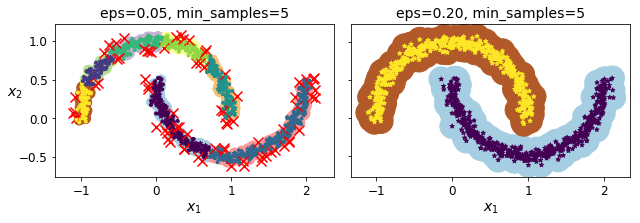

In [120]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_diagram")
plt.show()

In [121]:
dbscan = dbscan2

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [123]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [124]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_diagram


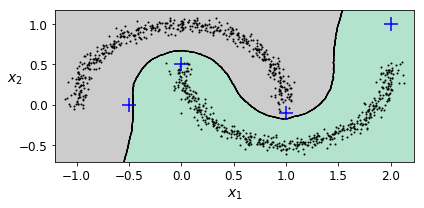

In [125]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_diagram")
plt.show()

In [126]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

## 5 Other Clustering Algorithms

### 5.1 Spectral Clustering - 光谱聚类

In [127]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=100, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [128]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=None, n_neighbors=10,
          random_state=42)

In [129]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [130]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

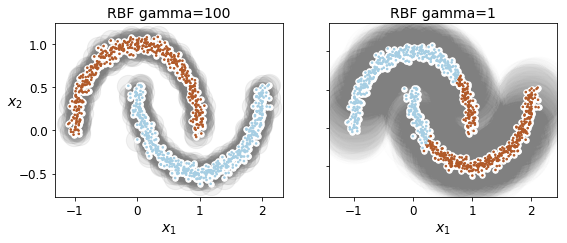

In [131]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

### 5.2  Agglomerative Clustering - 凝聚聚类

In [132]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [133]:
learned_parameters(agg)

NameError: name 'learned_parameters' is not defined

In [134]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## 6. Gaussian Mixtures

In [135]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

让我们在之前的数据集上训练高斯混合模型：

In [136]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

让我们看一下EM算法估计的参数：

In [137]:
gm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [138]:
gm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [139]:
gm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

算法真的收敛了吗？

In [140]:
gm.converged_

True

的确收敛了。 需要多少次迭代？

In [141]:
gm.n_iter_

4

您现在可以使用该模型来**预测每个实例所属的集群（硬集群）或它来自每个集群的概率**。 为此，只需使用**predict（）方法**或**predict_proba（）方法**：

In [142]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

这是一个生成模型，因此您可以从中对新实例进行采样（并获取其标签）：

In [144]:
X_new, y_new = gm.sample(6)
X_new

array([[ 2.95400315,  2.63680992],
       [-1.16654575,  1.62792705],
       [-1.39477712, -1.48511338],
       [ 0.27221525,  0.690366  ],
       [ 0.54095936,  0.48591934],
       [ 0.38064009, -0.56240465]])

In [145]:
y_new

array([0, 1, 2, 2, 2, 2])

请注意，它们是从每个集群中按顺序采样的。

你还可以使用**score_samples（）方法**在任何位置估计概率密度函数（PDF）的对数：

In [147]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

让我们检查PDF是否在整个空间中积分到1。我们只需在簇周围取一个大的正方形，然后将其切割成一个小方块网格，然后我们计算在每个小方块中生成实例的近似概率
（通过将微小正方形的一角处的PDF乘以正方形的面积），最后将所有这些概率相加）。 结果非常接近1：

In [148]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999217849

现在让我们绘制最终的决策边界（虚线）和密度等值线：

In [149]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

Saving figure gaussian_mixtures_diagram


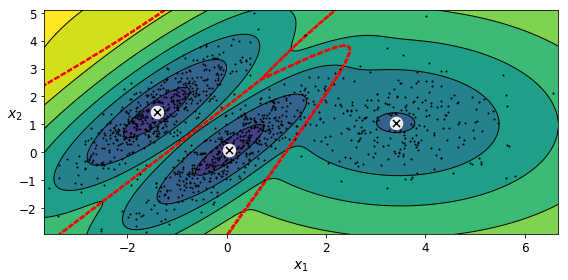

In [150]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_diagram")
plt.show()

你可以通过**设置covariance_type超参数**对算法查找的**协方差矩阵**施加约束：

- “full”（默认）：没有约束，所有聚类都可以采用任何大小的任何椭圆形。
- “tied”：所有簇必须具有相同的形状，可以是任何椭圆体（即，它们都共享相同的协方差矩阵）。
- “spherical”：所有簇必须是球形的，但它们可以具有不同的直径（即不同的方差）。
- “diag”：簇可以呈现任何大小的任何椭圆形，但椭球的轴必须与轴平行（即，协方差矩阵必须是对角线）。

In [151]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [152]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

Saving figure covariance_type_diagram


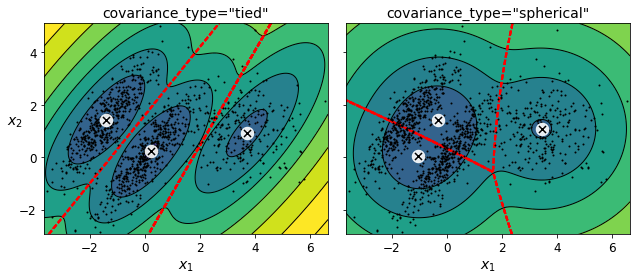

In [153]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_diagram")
plt.show()

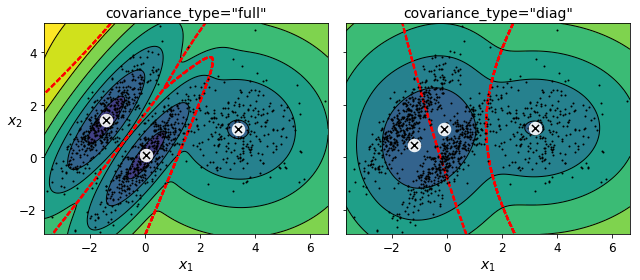

In [154]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

### 6.1 Anomaly Detection using Gaussian Mixtures - 使用高斯混合模型进行异常检测

高斯混合可用于**异常检测**：位于低密度区域的实例可被视为异常。你必须定义要使用的**密度阈值**。例如，在试图检测缺陷产品的制造公司中，缺陷产品的比例通常是众所周知的。假设它等于4％，那么你可以**将密度阈值设置为导致4％的实例位于低于阈值密度的区域中的值**：

In [155]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

Saving figure mixture_anomaly_detection_diagram


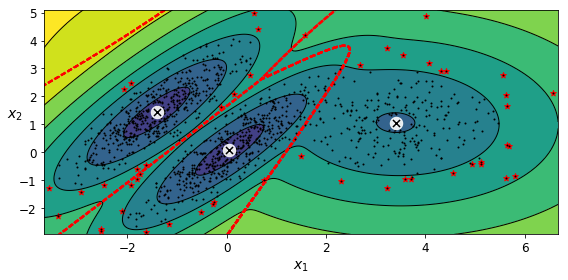

In [156]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(ymax=5.1)

save_fig("mixture_anomaly_detection_diagram")
plt.show()

### 6.2 Model selection - 模型选择

我们不能使用惯性或轮廓分数，因为它们都假设簇是球形的。相反，我们可以尝试找到最小化理论信息标准的模型，例如**贝叶斯信息准则（BIC）或Akaike信息准则（AIC）**：

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

- $m$ 是实例数量.
- $p$ 模型学到的参数数量.
- $\hat L$ 是模型似然函数的最大值。 这是基于模型及其优化参数，观察到的数据$ \ mathbf {X} $的条件概率。

BIC和AIC都会惩罚那些需要学习更多参数的模型（例如，更多集群），奖励适合数据的模型（即，对观察到的数据具有高可能性的模型）。

In [157]:
gm.bic(X)

8189.74345832983

In [159]:
gm.aic(X)

8102.518178214792

我们可以手动计算BIC

In [160]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)

bic = np.log(len(X)) * n_params - 2 * max_log_likelihood

aic = 2 * n_params - 2 * max_log_likelihood

In [161]:
bic,aic

(8189.74345832983, 8102.518178214792)

In [162]:
n_params

17

每个簇有一个权重，但总和必须等于1，所以我们有一个自由度小于-1。 类似地，$n \times n$协方差矩阵的自由度不是$ n ^ 2 $，而是$1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

让我们用各种值$ k $训练高斯混合模型并测量它们的BIC：

In [163]:
gms_per_k = [GaussianMixture(n_components= k,n_init = 10,random_state=42).fit(X)
            for k in range(1,11)]

In [164]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_diagram


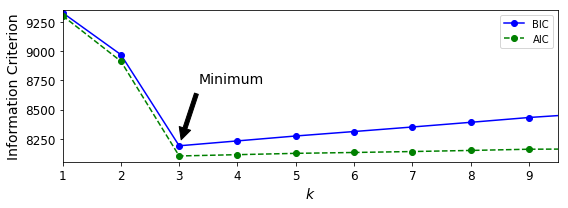

In [166]:
plt.figure(figsize=(8,3))
plt.plot(range(1,11),bics,"bo-",label="BIC")
plt.plot(range(1,11),aics,"go--",label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_diagram")
plt.show()

让我们搜索聚类数和covariance_type超参数的最佳值组合：

In [167]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [168]:
best_k

3

In [169]:
best_covariance_type

'full'

### 6.3 Variational Bayesian Gaussian Mixtures - 变分贝叶斯高斯混合

可以使用**BayesianGaussianMixture类**，它能够为不必要的簇提供等于（或接近）零的权重,而不是手动搜索最佳簇数。

只需将组件数设置为您认为大于最佳簇数的值，该算法将自动消除不必要的簇。

In [170]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

该算法自动检测到只需要3个组件：

In [171]:
np.round(bgm.weights_,2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

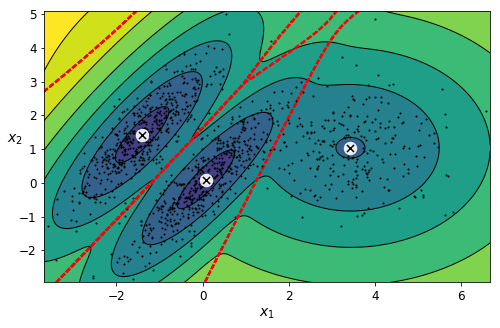

In [172]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()


In [173]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=1000, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=1, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=10000,
            weight_concentration_prior_type='dirichlet_process')

In [174]:
np.round(bgm_low.weights_,2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [175]:
np.round(bgm_high.weights_,2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

Saving figure mixture_concentration_prior_diagram


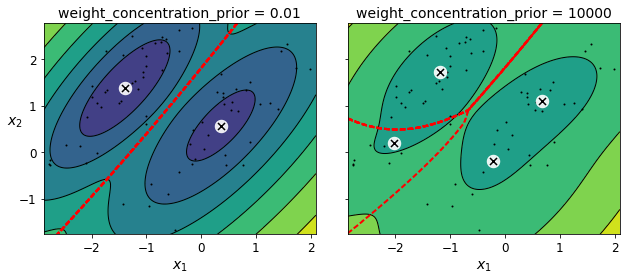

In [176]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

save_fig("mixture_concentration_prior_diagram")
plt.show()

注意：事实上，虽然有4个质心，但在右图中只能看到3个区域，这不是一个错误。右上方集群的权重远大于右下方集群的权重，因此该区域中任何给定点属于右上方集群的概率大于其属于右下方集群的概率。

In [177]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [178]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

Saving figure moons_vs_bgm_diagram


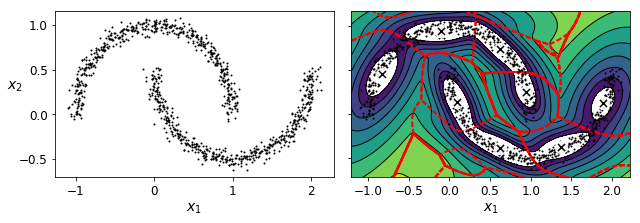

In [179]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_diagram")
plt.show()


这个算法不是检测到2个月形簇，而是检测到8个椭球簇。 但是，密度图看起来并不太糟糕，因此它可用于异常检测。

### 6.4 Likelihood Function - 似然函数

In [180]:
from scipy.stats import norm

xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1) / (xx[1] - xx[0])

Saving figure likelihood_function_diagram


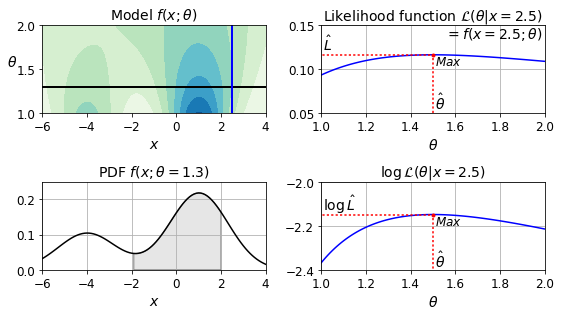

In [181]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig("likelihood_function_diagram")
plt.show()